In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt
from eegnet_repl.model import EEGNet, train, evaluate_model
from eegnet_repl.config import Paths
from eegnet_repl.dataset import build_dataset_from_preprocessed
from eegnet_repl.ui import plot_spatial_filters, plot_power_spectra_of_temporal_filters

2026-01-28 15:52:41,211 - __init__.py - wrapper - DEBUG - matplotlib data path: d:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\.eegnetenv\Lib\site-packages\matplotlib\mpl-data
2026-01-28 15:52:41,235 - __init__.py - wrapper - DEBUG - CONFIGDIR=C:\Users\Kseniia Dubivka\.matplotlib
2026-01-28 15:52:41,261 - __init__.py - <module> - DEBUG - interactive is False
2026-01-28 15:52:41,262 - __init__.py - <module> - DEBUG - platform is win32
2026-01-28 15:52:41,294 - __init__.py - wrapper - DEBUG - CACHEDIR=C:\Users\Kseniia Dubivka\.matplotlib
2026-01-28 15:52:41,308 - font_manager.py - _load_fontmanager - DEBUG - Using fontManager instance from C:\Users\Kseniia Dubivka\.matplotlib\fontlist-v390.json
2026-01-28 15:52:52,067 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-28 15:52:52,068 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-28 15:52:52,068 - __init__.py - <module> - DEBUG - Creating converter 

In [2]:
subject = 3

In [3]:
dataset = build_dataset_from_preprocessed(subject=subject,mode='Train')

2026-01-28 15:57:37,300 - dataset.py - build_dataset_from_preprocessed - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train
2026-01-28 15:57:37,302 - dataset.py - build_dataset_from_preprocessed - INFO - Found 1 preprocessed files for subject 3


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif...
    Range : 0 ... 338190 =      0.000 ...  2642.109 secs
Ready.
Reading 0 ... 338190  =      0.000 ...  2642.109 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:173: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(src_path, preload=True)


0 bad epochs dropped


In [4]:
generator = torch.Generator().manual_seed(42)
train_data, val_data = data.random_split(dataset=dataset,lengths=[0.9,0.1], generator=generator)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_data, batch_size=64, shuffle=False)

In [5]:
model = EEGNet(C=dataset.X.shape[1], T=dataset.X.shape[2])
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(
    params = model.parameters(),
    eps=1e-07,
    foreach=None, # default, "If memory is prohibitive, batch fewer parameters through the optimizer at a time or switch this flag to False"
    fused=None, # default, "To force running the for-loop implementation, pass False for either foreach or fused."
    )

In [6]:
best_model, train_losses, val_losses, val_accuracies = train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500)

2026-01-28 15:57:49,844 - model.py - train - INFO - Training on cpu device
d:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\.eegnetenv\Lib\site-packages\torch\nn\modules\conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(
2026-01-28 15:57:50,139 - model.py - train - INFO - Epoch: 1/500.. Training Loss: 1.393.. Validation Loss: 1.360.. Validation Accuracy: 28.57%.. 
2026-01-28 15:58:00,445 - model.py - train - INFO - Epoch: 50/500.. Training Loss: 0.996.. Validation Loss: 1.029.. Validation Accuracy: 50.00%.. 
2026-01-28 15:58:11,777 - model.py - train - INFO - Epoch: 100/500.. Training Loss: 0.872.. Validation Loss: 0.805.. Validation Accuracy: 64.29%.. 
2026-01-28 15:58:23,483 - model.py - train - INFO - Epoch: 150/500.. Tr

In [26]:
best_loss_idx = torch.argmin(torch.tensor(val_losses)).item()
best_acc_idx = torch.argmax(torch.tensor(val_accuracies)).item()

print(f'Best loss idx: {best_loss_idx}\nLoss: {val_losses[best_loss_idx]}\nAccuracy: {val_accuracies[best_loss_idx]}')
print(f'Best accuracy idx: {best_acc_idx}\nLoss: {val_losses[best_acc_idx]}\nAccuracy: {val_accuracies[best_acc_idx]}')

Best loss idx: 490
Loss: 0.3394179344177246
Accuracy: 89.28571428571429
Best accuracy idx: 181
Loss: 0.6414151191711426
Accuracy: 89.28571428571429


Text(0, 0.5, 'Loss')

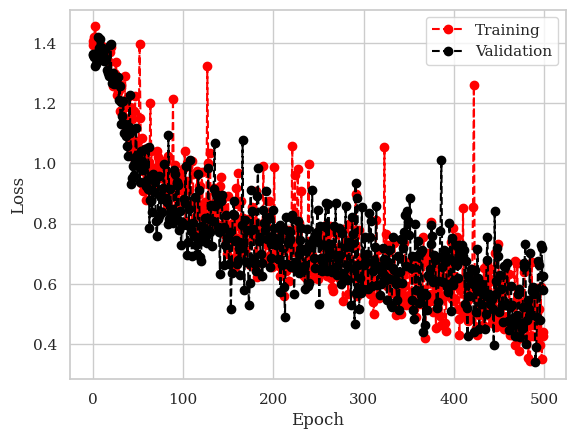

In [11]:
plt.plot(np.arange(len(train_losses)),train_losses,'ro--')
plt.plot(np.arange(len(val_losses)),val_losses,'ko--')
plt.legend(labels=['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [12]:
test_dataset = build_dataset_from_preprocessed(subject=subject,mode='Eval')

2026-01-28 16:06:04,466 - dataset.py - build_dataset_from_preprocessed - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval
2026-01-28 16:06:04,467 - dataset.py - build_dataset_from_preprocessed - INFO - Found 1 preprocessed files for subject 3


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval\A03E-preprocessed.fif...
    Range : 0 ... 332172 =      0.000 ...  2595.094 secs
Ready.
Reading 0 ... 332172  =      0.000 ...  2595.094 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('783')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:173: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Eval\A03E-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(src_path, preload=True)


0 bad epochs dropped


In [19]:
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
test_acc = evaluate_model(model,test_loader)
print(f'Test accuracy: {test_acc}%')

2026-01-28 16:08:11,751 - model.py - evaluate_model - INFO - Testing on cpu device


Test accuracy: 74.30555555555556%


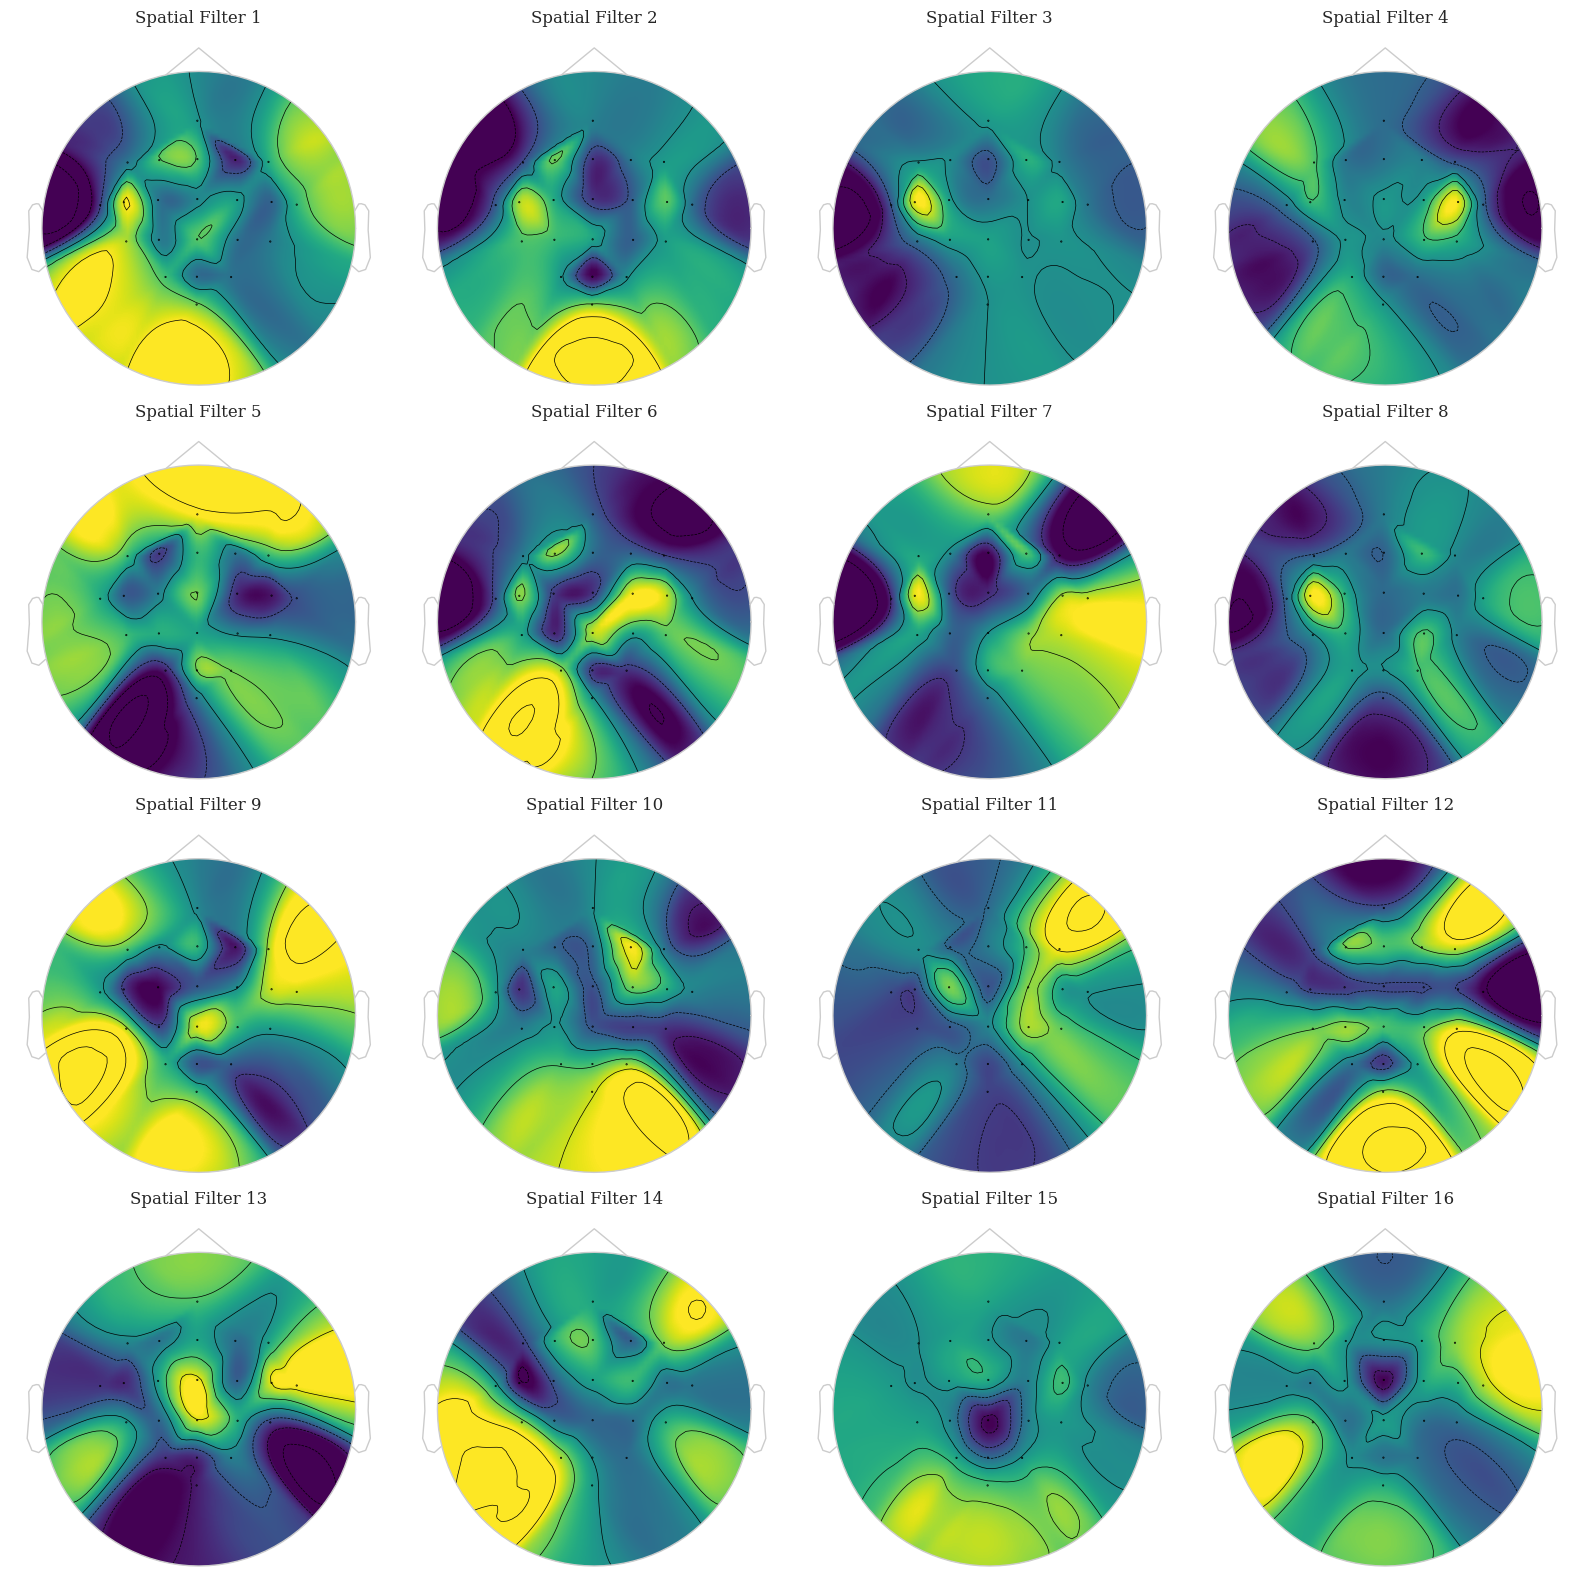

In [24]:
plot_spatial_filters(best_model)

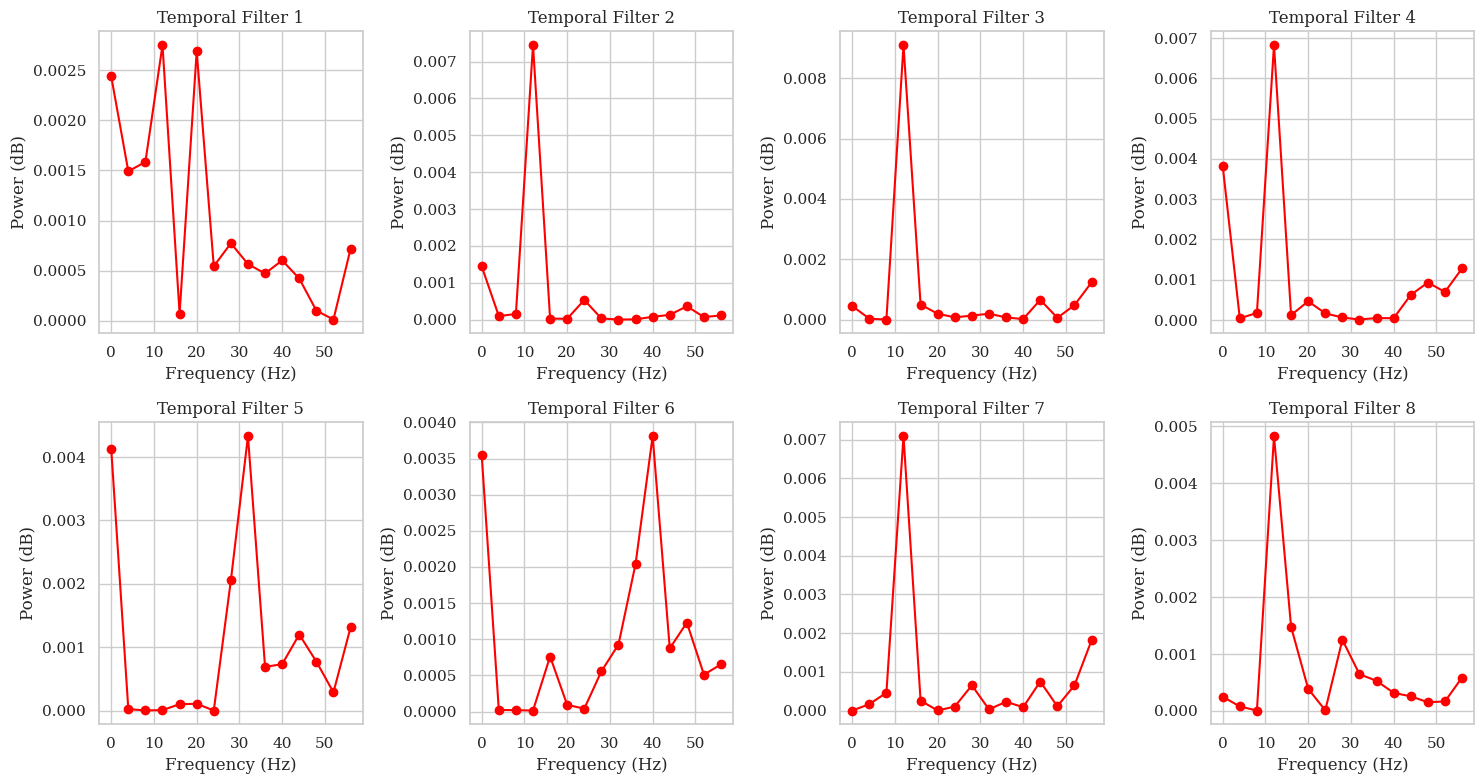

In [25]:
plot_power_spectra_of_temporal_filters(best_model)